In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st  

X: 1.2533524066524577


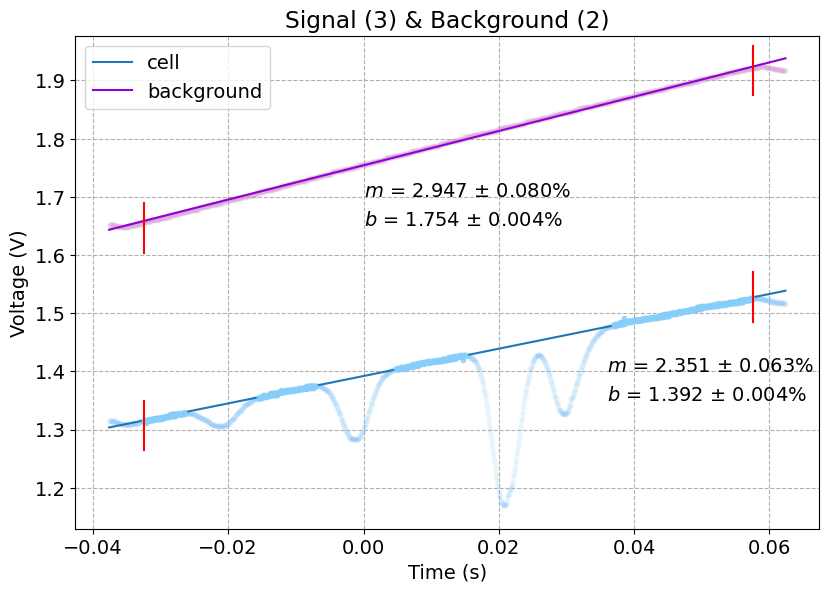

In [2]:
# Import data



# Cell
cell_slope = 2.3513634271957455
cell_slope_err = 0.0014853561676215579
cell_slope_err_perc = (cell_slope_err / cell_slope) * 100

cell_intercept = 1.391960782849549
cell_intercept_err = 5.141348625147278 * 10**(-5)
cell_intercept_err_perc = (cell_intercept_err / cell_intercept) * 100

# Background
bg_slope = 2.9470870103903586
bg_slope_err = 0.0023701762770099
bg_slope_err_perc = (bg_slope_err / bg_slope) * 100

bg_intercept = 1.7541911443318474
bg_intercept_err = 7.444766773217603 * 10**(-5)
bg_intercept_err_perc = (bg_intercept_err / bg_intercept) * 100

X = bg_slope / cell_slope

print(f'X: {X}')

data = pd.read_csv('trial_three.csv', sep=",", engine='python', names=['seconds', 'voltage', 'linear_fit', 'background_voltage', 'background_seconds', 'background_fit'])

# Split one
split_one_start = -0.0325
split_one_stop = -0.0265

# Split two
split_two_start = -0.0155
split_two_stop = -0.0072

# Split three
split_three_start = 0.0048
split_three_stop = 0.0150

# Split four
split_four_start = 0.0370
split_four_stop = 0.0575

plt.figure(figsize=(9.6,6.4))
plt.rcParams.update({'font.size': 14})

# chi2 = chi_squared(nineteen_eighty_fit, nineteen_eighty['temp'], nineteen_eighty['error'])
# dof = nineteen_eighty.shape[0] - 2
# prob = st.chi2.sf(chi2,dof)

# Cell Two
cell_trial_three_trim = pd.concat([data.loc[(data['seconds'] > split_one_start) & (data['seconds'] < split_one_stop)], data.loc[(data['seconds'] > split_two_start) & (data['seconds'] < split_two_stop)], data.loc[(data['seconds'] > split_three_start) & (data['seconds'] < split_three_stop)], data.loc[(data['seconds'] > split_four_start) & (data['seconds'] < split_four_stop)]])

# plt.figure(figsize=(36,48))
plt.plot(data['seconds'],data['voltage'],'.', alpha=0.05, color='lightskyblue')
plt.plot(data['seconds'],data['linear_fit'],'-',label='cell')
plt.plot(cell_trial_three_trim['seconds'], cell_trial_three_trim['voltage'],'.', alpha=0.75, color='lightskyblue')

plt.text(0.036,1.4,r'$m$ = {:.3f} $\pm$ {:.3f}%'.format(cell_slope,cell_slope_err_perc))
plt.text(0.036,1.35,r'$b$ = {:.3f} $\pm$ {:.3f}%'.format(cell_intercept,cell_intercept_err_perc))

plt.plot(data['seconds'],data['background_voltage'],'.', alpha=0.05, color='plum')
plt.plot(data['seconds'],data['background_fit'],'-',label='background', color='darkviolet')

plt.text(0.0,1.7,r'$m$ = {:.3f} $\pm$ {:.3f}%'.format(bg_slope,bg_slope_err_perc))
plt.text(0.0,1.65,r'$b$ = {:.3f} $\pm$ {:.3f}%'.format(bg_intercept,bg_intercept_err_perc))

plt.axvline(x=split_one_start,ymin=0.16,ymax=0.26,color='red')
plt.axvline(x=split_one_start,ymin=0.56,ymax=0.66,color='red')

plt.axvline(x=split_four_stop,ymin=0.42,ymax=0.52,color='red')
plt.axvline(x=split_four_stop,ymin=0.88,ymax=0.98,color='red')

# plt.text(1990,15.25,r'b_{cell} = {:.2f}'.format(prob))

plt.grid(True,linestyle='--')

plt.title('Signal (3) & Background (2)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

/var/folders/lz/1z1_9z594253mdvy0qdxzp340000gn/T/ipykernel_3381/2042055517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_data['residual'] = adjusted_data['background_voltage'] - adjusted_data['background_fit']


Text(0, 0.5, 'Voltage (V)')

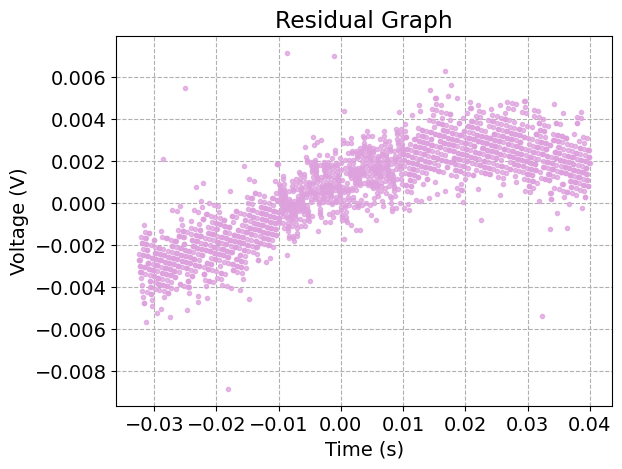

In [3]:
# plt.figure(figsize=(36,48))

adjusted_data = data.loc[(data['seconds'] > split_one_start) & (data['seconds'] < 0.04)]
adjusted_data['residual'] = adjusted_data['background_voltage'] - adjusted_data['background_fit']



plt.plot(adjusted_data['seconds'],adjusted_data['residual'],'.', alpha=0.75, color='plum')

plt.grid(True,linestyle='--')

plt.title('Residual Graph')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

In [4]:
np.std(adjusted_data['residual'])

0.002255150769082225

In [5]:
import experiment5.slope_factor_calculation as slp

factor = slp.slope_factor(m_sig=cell_slope,m_bg=bg_slope)
factor_percent = slp.slope_factor_percent(m_sig=cell_slope,m_bg=bg_slope)
factor_uncert = slp.slope_factor_uncertainty(m_sig=cell_slope,m_bg=bg_slope,m_sig_err=cell_slope_err,m_bg_err=bg_slope_err)
factor_uncert_percent = (factor_uncert / factor) * 100

print(f'factor: {factor}')
print(f'percent: {factor_percent}')
print(f'factor uncert: {factor_uncert}')
print(f'factor uncert %: {factor_uncert_percent}')

factor: 1.2533524066524577
percent: 0.202139801469827
factor uncert: 0.0012817652282219498
factor uncert %: 0.10226694594582375


/var/folders/lz/1z1_9z594253mdvy0qdxzp340000gn/T/ipykernel_3381/30073381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_data['adjusted_background'] = adjusted_data['background_voltage'] / factor


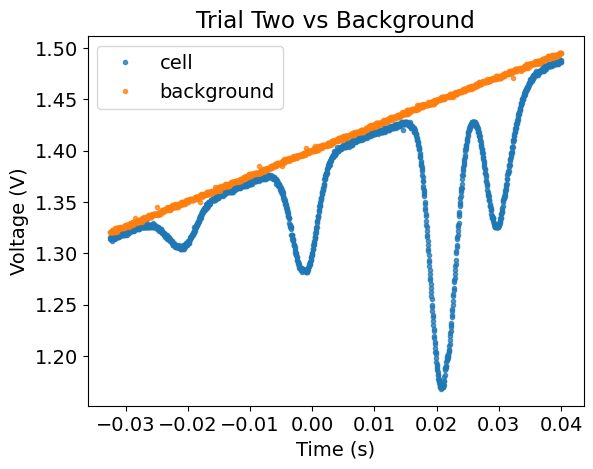

In [6]:


adjusted_data['adjusted_background'] = adjusted_data['background_voltage'] / factor

plt.plot(adjusted_data['seconds'],adjusted_data['voltage'],'.',label='cell', alpha=0.75)
# plt.plot(adjusted_data['seconds'],adjusted_data['linear_fit'],'-',label='cell fit', alpha=0.75)
plt.plot(adjusted_data['seconds'],adjusted_data['adjusted_background'],'.',label='background', alpha=0.75)
# plt.plot(data['seconds'],data['background_fit'],'-',label='bg fit', alpha=0.75)
# plt.grid(True,linestyle='--')
plt.title('Trial Two vs Background')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

/var/folders/lz/1z1_9z594253mdvy0qdxzp340000gn/T/ipykernel_3381/1522538011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_data['adjusted_signal'] = adjusted_data['voltage'] - adjusted_data['adjusted_background']


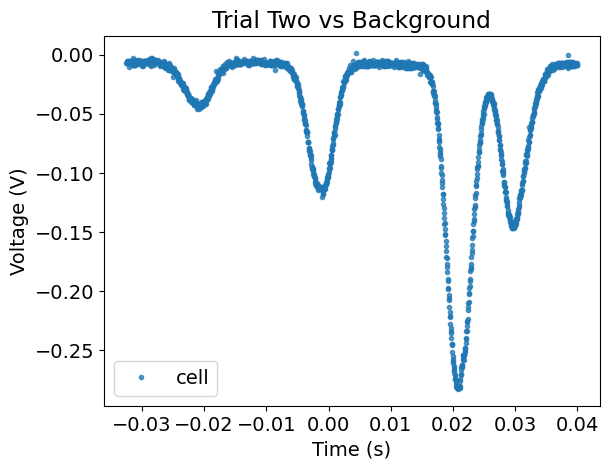

In [7]:
# Adjust

adjusted_data['adjusted_signal'] = adjusted_data['voltage'] - adjusted_data['adjusted_background']

plt.plot(adjusted_data['seconds'],adjusted_data['adjusted_signal'],'.',label='cell', alpha=0.75)
# plt.plot(data['seconds'],data['linear_fit'],'-',label='cell fit', alpha=0.75)
# plt.plot(data['seconds'],data['adjusted_background'],'.',label='background', alpha=0.75)
# plt.plot(data['seconds'],data['background_fit'],'-',label='bg fit', alpha=0.75)
# plt.grid(True,linestyle='--')
plt.title('Trial Two vs Background')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

/var/folders/lz/1z1_9z594253mdvy0qdxzp340000gn/T/ipykernel_3381/3591260833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_data['adjusted_signal'] = (adjusted_data['voltage'] - adjusted_data['adjusted_background']) * (-1)
/var/folders/lz/1z1_9z594253mdvy0qdxzp340000gn/T/ipykernel_3381/3591260833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_data['adjusted_seconds'] = adjusted_data['seconds'] - min(adjusted_data['seconds'])


Text(0, 0.5, 'Voltage (V)')

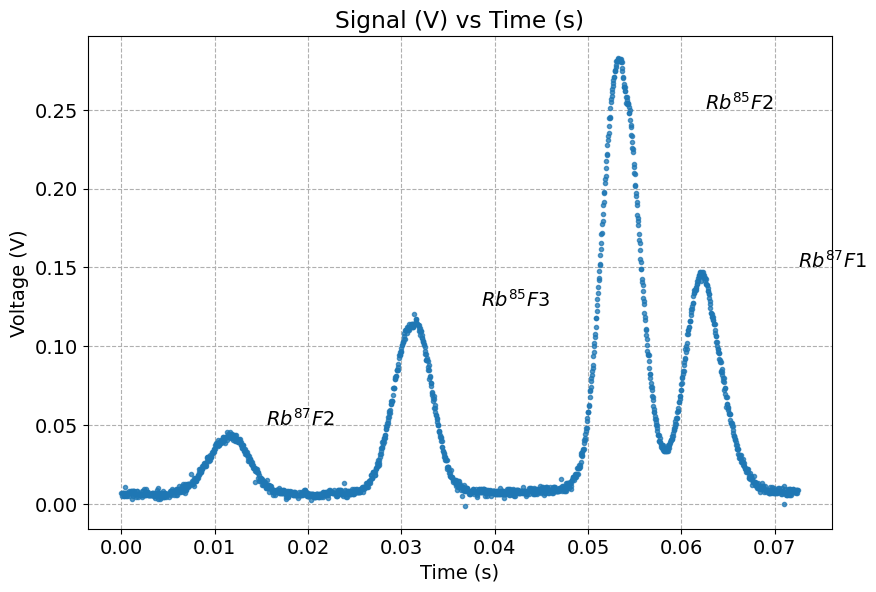

In [8]:
# Invert


adjusted_data['adjusted_signal'] = (adjusted_data['voltage'] - adjusted_data['adjusted_background']) * (-1)
adjusted_data['adjusted_seconds'] = adjusted_data['seconds'] - min(adjusted_data['seconds'])

plt.figure(figsize=(9.6,6.4))
plt.rcParams.update({'font.size': 14})

plt.plot(adjusted_data['adjusted_seconds'],adjusted_data['adjusted_signal'],'.',label='cell', alpha=0.75)

plt.text(0.0155,0.05,r'${R b}^{87} F2$')
plt.text(0.0385,0.125,r'${R b}^{85} F3$')
plt.text(0.0625,0.25,r'${R b}^{85} F2$')
plt.text(0.0725,0.15,r'${R b}^{87} F1$')

plt.grid(True,linestyle='--')

plt.title('Signal (V) vs Time (s)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
# plt.legend()

In [9]:
# Export data
# adjusted_data

pd.DataFrame.to_csv(adjusted_data, './methodologies/adjusted_data.csv', columns=['seconds', 'voltage', 'linear_fit', 'background_voltage', 'background_seconds', 'background_fit', 'residual', 'adjusted_background', 'adjusted_signal', 'adjusted_seconds', 'frequency'], index=False, header=False)

KeyError: "['frequency'] not in index"